# Goal

This notebook shows that the starting position of a MetropolisHastings algorithm run can get stuck on local maxima. The parameters for the likelihood and generator function are chosen so that we can see the occasional jump from one area to another

# Imports

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from src.algorithms import AbstractMetropolisHastings

# Setup

We use the likelihood function $e^{-a_0(x-a_1)^2} + e^{-a_2(x-a_3)^2}$

In [2]:
class Doublet(AbstractMetropolisHastings[float]):

    def generator_function(self):
        sigma = 1
        return self.current_configuration + np.random.normal(0, sigma)

    def state_likelihood(self, x: float):
        d = 4
        a = [1, -1 * d, 1, d]
        aux_exp = lambda mu, sigma: np.exp(np.prod([-1, mu, x - sigma, x - sigma]))
        return aux_exp(a[0], a[1]) + aux_exp(a[2], a[3])

    def __repr__(self):
        # Useful for outputting the class
        return f"{self.current_configuration:e}"

# Trial run

In [3]:
doublet = Doublet(initial_configuration=np.random.normal(0, 1))
doublet.run_iterations(n=10 ** 7)

Rejected 39.2%: 100%|██████████| 10000000/10000000 [05:16<00:00, 31547.24it/s]


# Plot

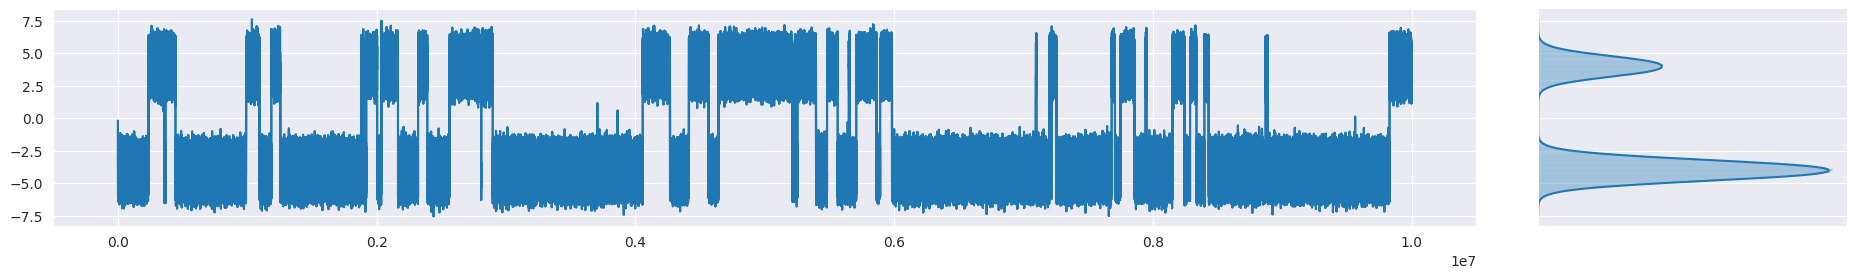

In [4]:
y = doublet.configuration_history
x = range(len(y))

grid = sns.JointGrid(x=x, y=y, ratio=4)
grid.plot_joint(plt.plot)
grid.ax_joint.plot(x, y, c='C0')

plt.sca(grid.ax_marg_y)
sns.histplot(y=grid.y, kde=True)

# override a bunch of the default JointGrid style options
grid.fig.set_size_inches(20, 3)
grid.ax_marg_x.remove()
grid.ax_joint.spines['top'].set_visible(True)